# In this document, we consider the particles creation.

One can easily get the equations below
$$\phi''=-(3-\frac{\rho+p}{2M^2_\rm P H^2}+\frac{\Gamma^\phi}{H})\phi'-\frac{V_\phi}{H^2}+b_\phi e^{2b}\chi'^2\,.$$
$$\chi''=-(3-\frac{\rho+p}{2M^2_\rm P H^2}+\frac{\Gamma^\chi}{H}+2b_\phi \phi')\chi'-e^{-2b}\frac{V_\chi}{H^2}\,.$$
$$\rho'_r=-4\rho_r+H\Gamma_r^\phi\phi'^2+H\Gamma_r^\chi e^{2b}\chi'^2$$
$$\rho'_m=-3\rho_m+H\Gamma_m^\phi\phi'^2+H\Gamma_m^\chi e^{2b}\chi'^2$$
$$H'=-\frac{\rho+p}{2M^2_\rm P H}=\frac{1}{2M_\rm P ^2H}(\frac{4}{3}\rho_r+\rho_m+H^2\phi'^2+H^2e^{2b}\chi'^2)$$
where $\Gamma_\phi=\Gamma_r^\phi+\Gamma_m^\phi\qquad \Gamma_\chi=\Gamma_r^\chi+\Gamma_m^\chi$. Letters $r$ and $m$ are radiation and matter.

Let's consider double inflation model as an example
$$V=\frac{1}{2}m_\phi\phi^2+\frac{1}{2}m_\chi\chi^2\qquad \qquad \qquad b(\phi)=0$$

In [2]:
# select initial values here
m_p=1#plank mass
mphi=1e-6*m_p
mchi=15*mphi

phii=10*m_p
chii=10*m_p
phi_Ni=0
chi_Ni=0
#decay rate
Gamma_phi_r=5e-9*m_p
Gamma_phi_m=1e-9*m_p
Gamma_chi_r=5e-9*m_p
Gamma_chi_m=1e-9*m_p
# initial value of rho
rho_ri=1e-20*m_p**4
rho_mi=1e-20*m_p**4
Nend=65

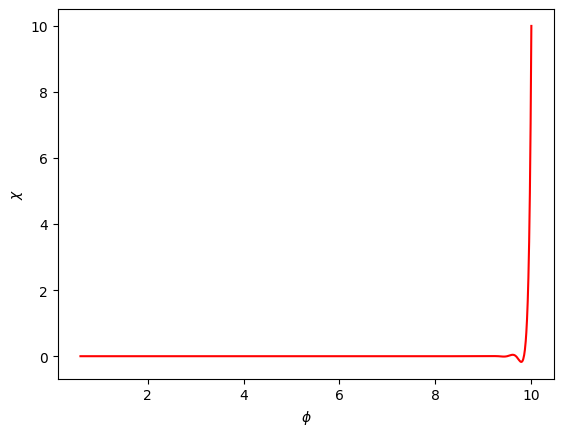

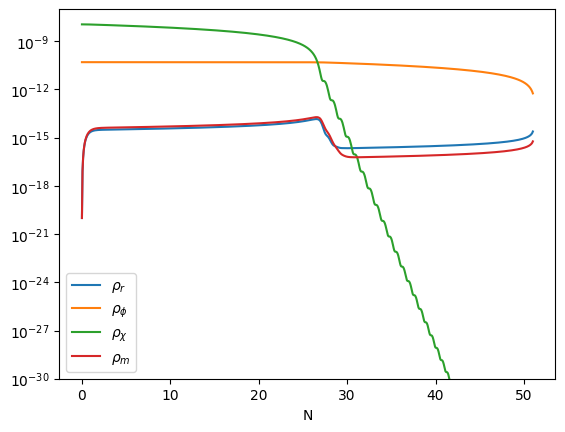

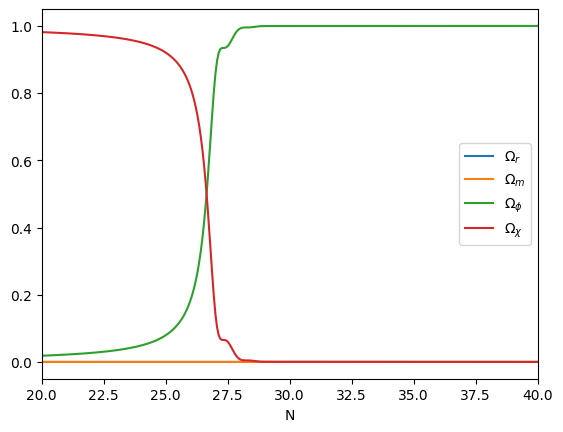

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve


def e2b(phi):
    return 1
def em2b(phi):
    return 1/e2b(phi)
def b_phi(phi):
    return 0
def V_phi(phi):
    return mphi**2*phi/m_p**2
def V_chi(chi):
    return mchi**2*chi/m_p**2
def Vp(phi,chi):
    return (mchi**2*chi**2+mphi**2*phi**2)/(2*m_p**4)

# defination above should be changed for different models

phi=phii
chi=chii
Hi=(2*Vp(phi,chi)/ 6)**0.5

rho_phii=mphi**2*phi**2/(2*m_p**4)
rho_chii=mchi**2*chi**2/(2*m_p**4)



Gamma_chi=Gamma_chi_r+Gamma_chi_m
Gamma_phi=Gamma_phi_r+Gamma_phi_m
def sys(t, var):#here, t actully is N, to avoid naming trouble later, we will briefly use t here.
    phi,chi,phi_N,chi_N,rho_r,rho_m,H = var
    dphidN=phi_N
    dchidN=chi_N
    dphi_NdN = -(3+Gamma_phi/H-(4*rho_r/3+rho_m+H**2*phi_N**2+H**2*e2b(phi)*chi_N**2)/(2*m_p**2*H**2))*phi_N-V_phi(phi)/(H**2)+b_phi(phi)*e2b(phi)*chi_N**2
    dchi_NdN = -(3+Gamma_chi/H+2*b_phi(phi)*phi_N-(4*rho_r/3+rho_m+H**2*phi_N**2+H**2*e2b(phi)*chi_N**2)/(2*m_p**2*H**2))*chi_N-em2b(phi)*V_chi(chi)/(H**2)
    drho_rdN = -4*rho_r+H*Gamma_phi_r*phi_N**2+H*Gamma_chi_r*chi_N**2*e2b(phi)
    drho_mdN = -3*rho_m+H*Gamma_phi_m*phi_N**2+H*Gamma_chi_r*chi_N**2*e2b(phi)
    dHdN=-1/H*(4*rho_r/3+rho_m+H**2*phi_N**2++H**2*e2b(phi)*chi_N**2)/(2*m_p**2)
    return [dphidN,dchidN,dphi_NdN,dchi_NdN,drho_rdN,drho_mdN,dHdN]
NN = np.linspace(0, Nend, 1000)  # Time points where solution is needed
sol = solve_ivp(sys, [NN[0], NN[-1]], [phii,chii, phi_Ni,chi_Ni, rho_ri, rho_mi,Hi], t_eval=NN, rtol=1e-12, atol=1e-12, method='RK45')
N = sol.t
phi,chi, phi_N,chi_N,rho_r, rho_m,H = sol.y
# Note that here we have chosen a particular potential m^2 field^2
rho_chi=0.5*H**2*chi_N**2*e2b(phi)+0.5*mchi**2*chi**2
rho_phi=0.5*H**2*phi_N**2+0.5*mphi**2*phi**2
plt.plot(phi, chi, 'r')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\chi$')
plt.show()
# plt.plot(t, rho_r, label=r'$\rho_r$')
# plt.plot(t, rho_phi, label=r'$\rho_\phi$')
# plt.plot(t, rho_chi, label=r'$\rho_\chi$')
# plt.plot(t, rho_m, label=r'$\rho_m$')
# plt.legend()
# plt.xlabel('N')
# plt.ylim(0,5e-10)
# plt.show()
# plt.plot(t, rho_r, label=r'$\rho_r$')
# plt.plot(t, rho_phi, label=r'$\rho_\phi$')
# plt.plot(t, rho_chi, label=r'$\rho_\chi$')
# plt.plot(t, rho_m, label=r'$\rho_m$')
# plt.legend()
# plt.xlabel('N')
# plt.ylim(0,3e-13)
# plt.show()
plt.plot(N, rho_r, label=r'$\rho_r$')
plt.plot(N, rho_phi, label=r'$\rho_\phi$')
plt.plot(N, rho_chi, label=r'$\rho_\chi$')
plt.plot(N, rho_m, label=r'$\rho_m$')
plt.legend()
plt.xlabel('N')
plt.yscale('log')
plt.ylim(1e-30,1e-7)
plt.show()
Omega_phi=rho_phi/(rho_phi+rho_r+rho_m+rho_chi)
Omega_chi=rho_chi/(rho_phi+rho_r+rho_m+rho_chi)
Omega_r=rho_r/(rho_phi+rho_r+rho_m+rho_chi)
Omega_m=rho_m/(rho_phi+rho_r+rho_m+rho_chi)
plt.plot(N, Omega_r, label=r'$\Omega_r$')
plt.plot(N, Omega_m, label=r'$\Omega_m$')
plt.plot(N, Omega_phi, label=r'$\Omega_\phi$')
plt.plot(N, Omega_chi, label=r'$\Omega_\chi$')
plt.legend()
plt.xlabel('N')
plt.xlim(20,40)
plt.show()

# References
[1] Braglia, Matteo, et al. "Generating primordial features at large scales in two field models of inflation." Journal of Cosmology and Astroparticle Physics 2020.08 (2020): 025.